<a href="https://colab.research.google.com/github/gabchx/opendata-valeur-foncieres/blob/main/Python_TD8_9_CHAIX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                                                     Gabriel Chaix 33% | Nom2 33% | Nom3 33%
#TD 8/9 : Analyse des données
##**Demandes de valeurs foncières**

###*Dataset OpenData :*
> [data.gouv.fr/demandes-de-valeurs-foncieres](https://www.data.gouv.fr/fr/datasets/demandes-de-valeurs-foncieres/)

---

Il s'agit des transactions immobilières intervenues au cours des cinq dernières années sur le territoire métropolitain et les DOM-TOM, à l’exception de l’Alsace, de la Moselle et de Mayotte. Les données contenues sont issues des actes notariés et des informations cadastrales.





---


##**Rapport :**

##### blablablabalbalb
abla lbalba lb albalblbl abllblab lblbl

---



##Libraries

Install

In [ ]:
# install calmap pour colab
#! pip install calmap

In [ ]:
#mettre à jour plotly pour colab
#!pip install plotly==4.5.2
#!pip install plotly
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 32.3 MB/s eta 0:00:00


Imports

In [ ]:
# libraries essentielles
import json
import requests
import random
from urllib.request import urlopen

# analyse et stockage
import numpy as np
import pandas as pd

# visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import geopandas as gpd

In [ ]:
colors1 = ['#DAF7A6', '#FFC300', '#FF5733', '#C70039', '#900C3F', '#581845']
colors2 = ["#e60049", "#0bb4ff", "#50e991", "#e6d800", "#9b19f5", "#ffa300", "#dc0ab4", "#b3d4ff", "#00bfa0"]
colors3 = ["#1984c5", "#22a7f0", "#63bff0", "#a7d5ed", "#e2e2e2", "#e1a692", "#de6e56", "#e14b31", "#c23728"]

##I ] Chargement

In [ ]:
df = pd.read_csv('https://static.data.gouv.fr/resources/demandes-de-valeurs-foncieres/20230405-160733/valeursfoncieres-2022.txt', sep = '|')
df.info()

<ipython-input-5-9b8eaf9232ee>:1: DtypeWarning: Columns (18,23,24,26,28,29,31,33,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('https://static.data.gouv.fr/resources/demandes-de-valeurs-foncieres/20230405-160733/valeursfoncieres-2022.txt', sep = '|')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3803885 entries, 0 to 3803884
Data columns (total 43 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   Identifiant de document     float64
 1   Reference document          float64
 2   1 Articles CGI              float64
 3   2 Articles CGI              float64
 4   3 Articles CGI              float64
 5   4 Articles CGI              float64
 6   5 Articles CGI              float64
 7   No disposition              int64  
 8   Date mutation               object 
 9   Nature mutation             object 
 10  Valeur fonciere             object 
 11  No voie                     float64
 12  B/T/Q                       object 
 13  Type de voie                object 
 14  Code voie                   object 
 15  Voie                        object 
 16  Code postal                 float64
 17  Commune                     object 
 18  Code departement            object 
 19  Code commune         

In [ ]:
# formatage des nom de colonnes
df = df.rename(columns=lambda x: x.replace(' ', '_').lower())

##II ] Nettoyage

In [ ]:
#Vérifier les parts des données manquantes dans la base brutes
df.isnull().sum()/len(df)*100

identifiant_de_document       100.000000
reference_document            100.000000
1_articles_cgi                100.000000
2_articles_cgi                100.000000
3_articles_cgi                100.000000
4_articles_cgi                100.000000
5_articles_cgi                100.000000
no_disposition                  0.000000
date_mutation                   0.000000
nature_mutation                 0.000000
valeur_fonciere                 0.649888
no_voie                        34.733621
b/t/q                          95.374019
type_de_voie                   36.984294
code_voie                       1.026398
voie                            1.029290
code_postal                     1.029816
commune                         0.000000
code_departement                0.000000
code_commune                    0.000000
prefixe_de_section             95.824295
section                         0.004075
no_plan                         0.000000
no_volume                      99.765792
1er_lot         

In [ ]:
# suppression des attribut non nécessaire
df = df.drop(['identifiant_de_document',
              'reference_document',
              '1_articles_cgi',
              '2_articles_cgi',
              '3_articles_cgi',
              '4_articles_cgi',
              '5_articles_cgi',
              'prefixe_de_section',
              'no_volume',
              '3eme_lot',
              '4eme_lot',
              '5eme_lot',
              'identifiant_local',
              'nature_culture_speciale',
              ],axis= 1)
# suppression des doubles
df = df.drop_duplicates()
# suppression des ligne null
df = df.dropna(how="all")

In [ ]:
# correction des type de donnée
df['date_mutation'] = pd.to_datetime(df['date_mutation'])
df['nature_mutation'] = df['nature_mutation'].astype('category')
df['valeur_fonciere'] = df['valeur_fonciere'].str.replace(',', '.').astype('float')
df['no_voie'] = df['no_voie'].astype('Int32')
df['b/t/q'] = df['b/t/q'].astype('category')
df['code_postal'] = df['code_postal'].astype('Int32')
df['code_commune'] = df['code_commune'].astype('int32')
df['no_plan'] = df['no_plan'].astype('int32')
df['1er_lot'] = df['1er_lot'].astype('category')
df['2eme_lot'] = df['2eme_lot'].astype('category')
df['surface_carrez_du_1er_lot'] = df['surface_carrez_du_1er_lot'].str.replace(',', '.').astype('float')
df['surface_carrez_du_2eme_lot'] = df['surface_carrez_du_2eme_lot'].str.replace(',', '.').astype('float')
df['surface_carrez_du_3eme_lot'] = df['surface_carrez_du_3eme_lot'].str.replace(',', '.').astype('float')
df['surface_carrez_du_4eme_lot'] = df['surface_carrez_du_4eme_lot'].str.replace(',', '.').astype('float')
df['surface_carrez_du_5eme_lot'] = df['surface_carrez_du_5eme_lot'].str.replace(',', '.').astype('float')
df['nombre_de_lots'] = df['nombre_de_lots'].astype('int32')
df['code_type_local'] = df['code_type_local'].astype('Int32')
df['type_local'] = df['type_local'].astype('category')
df['surface_reelle_bati'] = df['surface_reelle_bati'].astype('float')
df['nombre_pieces_principales'] = df['nombre_pieces_principales'].astype('Int32')
df['nature_culture'] = df['nature_culture'].astype('category')
df['surface_terrain'] = df['surface_terrain'].astype('float')

<ipython-input-9-c2ed93365ed0>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['date_mutation'] = pd.to_datetime(df['date_mutation'])


In [ ]:
#suppression des valeur_fonciere null
df = df[df['valeur_fonciere'] > 0]
df['surface_carrez_du_1er_lot'].fillna(0, inplace=True)
df['surface_carrez_du_2eme_lot'].fillna(0, inplace=True)
df['surface_carrez_du_3eme_lot'].fillna(0, inplace=True)
df['surface_carrez_du_4eme_lot'].fillna(0, inplace=True)
df['surface_carrez_du_5eme_lot'].fillna(0, inplace=True)


<ipython-input-10-646e0f7d06bf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['surface_carrez_du_1er_lot'].fillna(0, inplace=True)
<ipython-input-10-646e0f7d06bf>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['surface_carrez_du_2eme_lot'].fillna(0, inplace=True)
<ipython-input-10-646e0f7d06bf>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['surface_carrez_du_3eme_lot'].fillna(0, inplace=True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3509650 entries, 0 to 3803884
Data columns (total 29 columns):
 #   Column                      Dtype         
---  ------                      -----         
 0   no_disposition              int64         
 1   date_mutation               datetime64[ns]
 2   nature_mutation             category      
 3   valeur_fonciere             float64       
 4   no_voie                     Int32         
 5   b/t/q                       category      
 6   type_de_voie                object        
 7   code_voie                   object        
 8   voie                        object        
 9   code_postal                 Int32         
 10  commune                     object        
 11  code_departement            object        
 12  code_commune                int32         
 13  section                     object        
 14  no_plan                     int32         
 15  1er_lot                     category      
 16  surface_carrez_du_

In [ ]:
df.head()

,no_disposition,date_mutation,nature_mutation,valeur_fonciere,no_voie,b/t/q,type_de_voie,code_voie,voie,code_postal,...,surface_carrez_du_3eme_lot,surface_carrez_du_4eme_lot,surface_carrez_du_5eme_lot,nombre_de_lots,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,nature_culture,surface_terrain
0,1,2022-03-01,Vente,55000.0,13,NaN,RUE,2280,DE LA LIBERTE,1000,...,0.0,0.0,0.0,1,2,Appartement,24.0,1,NaN,NaN
1,1,2022-03-01,Vente,143000.0,<NA>,NaN,NaN,B010,CHAMP COCHET,1480,...,0.0,0.0,0.0,0,<NA>,NaN,NaN,<NA>,S,84.0
2,1,2022-03-01,Vente,143000.0,<NA>,NaN,NaN,B010,CHAMP COCHET,1480,...,0.0,0.0,0.0,0,<NA>,NaN,NaN,<NA>,S,88.0
3,1,2022-03-01,Vente,143000.0,98,NaN,RTE,0055,DE LA DOMBES,1480,...,0.0,0.0,0.0,1,2,Appartement,140.0,3,NaN,NaN
4,1,2022-04-01,Vente,300.0,<NA>,NaN,NaN,B031,AUX PIERRES,1480,...,0.0,0.0,0.0,0,<NA>,NaN,NaN,<NA>,T,510.0


##III ] Interprétation


1. Quelle est la part de maison, d'appartement, ect.. dans le dataset?

In [ ]:
# Quelle est la part de maison, d'appartement, ect.. dans le dataset?
types = df['type_local'].value_counts(dropna = False, normalize = True).head()
plt.figure(figsize=(8,8))
plt.pie(types.values, labels=types.index, colors = colors2, startangle=65)
plt.title(label= 'Parts des type de biens')
plt.legend(loc = 4)

2. Quelle est la valeur fonciére moyenne par departement en 2022 (bar plot) ?

In [ ]:
#Quelle est la valeur fonciére moyenne par departement en utilisant un bar plot ?
grouped_vf_dept = df.groupby('code_departement')['valeur_fonciere'].mean().reset_index()
grouped_vf_dept['code_departement'] = grouped_vf_dept['code_departement'].astype('string')
fig = px.bar(grouped_vf_dept, y='valeur_fonciere',
             x='code_departement',
             text_auto='.2s')
fig.update_layout(title="Valeur fonciére moyenne par departement", 
                  yaxis_title='Valeur foncière moyenne (€)', 
                  xaxis_title='Département')
fig.show()

3. Quelle est la valeur fonciére moyenne par departement en 2022 (geojson et choropleth) ?

In [ ]:
#Quelle est la valeur fonciére moyenne par departement en utilisant geojson et choropleth ?
geojson_url = "https://france-geojson.gregoiredavid.fr/repo/departements.geojson"
geojson_data = requests.get(geojson_url).json()

fig = px.choropleth(grouped_vf_dept, 
                    geojson=geojson_data, 
                    locations='code_departement', 
                    color='valeur_fonciere',
                    color_continuous_scale='pinkyl',
                    featureidkey='properties.code',
                    projection="mercator",
                    title='Valeur fonciere moyenne par departments')
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(height=600, width=800)
fig.show()

4. Quelle est la valeur fonciére moyenne par pays, par deparement et part commune treemap

In [ ]:
# Quel est la valeur fonciére moyenne par pays, par deparement et part commune treemap
df_avg = df.groupby(['code_departement', 'code_commune'])['valeur_fonciere'].mean().reset_index()
df_avg['code_pay'] = 'France'
df_avg.head()

fig = px.treemap(df_avg,
                 path=['code_pay','code_departement', 'code_commune'],
                 values='valeur_fonciere',
                 color='valeur_fonciere',
                 hover_data=['code_pay','code_departement', 'code_commune'])
fig.update_traces(root_color="lightgrey")
fig.update_layout(title='Carte proportionelle de la valeur fonciere moyenne')
fig.show()

On s'aperçois que la valeur fonciére est fortement correler avec la position geographique.

5. La surface reel batie moyenne par départements?

In [ ]:
grouped_srb_dept = df[df['surface_reelle_bati'] > 0]
grouped_srb_dept = grouped_srb_dept.groupby('code_departement')['surface_reelle_bati'].mean().reset_index()
grouped_srb_dept['code_departement'] = grouped_srb_dept['code_departement'].astype('string')
fig = px.bar(grouped_srb_dept, y='surface_reelle_bati',
             x='code_departement',
             text_auto='.2s')
fig.update_layout(title="Surface réel batie moyenne par departement", 
                  yaxis_title='Valeur foncière moyenne (€)', 
                  xaxis_title='Département')
fig.show()

6. Quels sont les départements les plus chers pour l'immobilier en 2022 ?

In [ ]:
grouped_vf_dept_top10 = grouped_vf_dept.sort_values('valeur_fonciere', ascending=False).head(10)

fig = px.bar(grouped_vf_dept_top10, x='valeur_fonciere', y='code_departement', orientation='h')

fig.update_layout(title='Les départements les plus chers pour l\'immobilier en 2021', 
                  xaxis_title='Valeur foncière moyenne (€)', 
                  yaxis_title='Département')
fig.show()

7. Quel est la valur fonciére moyenne à Paris en 2022 ?

In [ ]:
#Quelle est la valeur fonciére moyenne par commune dans le 75 en utilisant geojson et choropleth ?

geojson_url = "https://france-geojson.gregoiredavid.fr/repo/departements/75-paris/communes-75-paris.geojson"
geojson_data = requests.get(geojson_url).json()

vf_com_paris = df[(df['code_departement']==75) & df['valeur_fonciere'] > 0]
vf_com_paris = vf_com_paris.groupby('code_commune')['valeur_fonciere'].mean().reset_index()
vf_com_paris['code_commune'] = '75'+vf_com_paris['code_commune'].astype(str)

fig = px.choropleth(vf_com_paris, 
                    geojson=geojson_data, 
                    locations='code_commune', 
                    color='valeur_fonciere',
                    color_continuous_scale='Reds',
                    featureidkey='properties.code',
                    projection="mercator",
                    title="Valeur fonciére moyenne en €")
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(height=600,
                  width=800)
fig.show()

8. Quel est le prix moyen du mètre carré pour les appartements à Paris en 2022 ?

In [ ]:
#Quelle est le prix moyen d'un metre carré dans les commune du 75 en utilisant geojson et choropleth ?
geojson_url = "https://france-geojson.gregoiredavid.fr/repo/departements/75-paris/communes-75-paris.geojson"
geojson_data = requests.get(geojson_url).json()

vf_com_paris = df[(df['code_departement'] == 75) & (df['nombre_de_lots']<6) & ((df['surface_carrez_du_1er_lot'] + df['surface_carrez_du_2eme_lot'] + df['surface_carrez_du_3eme_lot'] + df['surface_carrez_du_4eme_lot'] + df['surface_carrez_du_5eme_lot']) > 0)]
vf_com_paris['surface_totale'] = vf_com_paris['surface_carrez_du_1er_lot'] + vf_com_paris['surface_carrez_du_2eme_lot'] + vf_com_paris['surface_carrez_du_3eme_lot'] + vf_com_paris['surface_carrez_du_4eme_lot'] + vf_com_paris['surface_carrez_du_5eme_lot']
vf_com_paris['prix_m2'] = vf_com_paris['valeur_fonciere'] / vf_com_paris['surface_totale']
vf_com_paris = vf_com_paris.groupby('code_commune')['prix_m2'].mean().reset_index()
vf_com_paris['code_commune'] = '75'+vf_com_paris['code_commune'].astype(str)

fig = px.choropleth(vf_com_paris, 
                    geojson=geojson_data, 
                    locations='code_commune', 
                    color='prix_m2',
                    color_continuous_scale='Reds',
                    featureidkey='properties.code',
                    projection="mercator",
                    title="Prix moyen d'un metre carré en €")
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(height=600,
                  width=800)
fig.show()

<ipython-input-14-ced1dcf09791>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-14-ced1dcf09791>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



9. Comment la valeur foncière varie-t-elle selon le type de voie ?

In [ ]:
grouped_vf_tv = df.loc[:, ['type_de_voie', 'valeur_fonciere']]
grouped_vf_tv = grouped_vf_tv.dropna(subset=['type_de_voie'])
fig = px.box(grouped_vf_tv, x="type_de_voie", y="valeur_fonciere", points="all",
             labels={'type_de_voie': 'Type de voie', 'valeur_fonciere': 'Valeur foncière'})

fig.update_layout(title_text='Distribution de la valeur foncière selon le type de voie')
fig.show()

10. Comment la valeur foncière varie-t-elle selon le type de bien ?

In [ ]:
grouped_vf_tl = df.loc[:, ['type_local', 'valeur_fonciere']]
grouped_vf_tl = grouped_vf_tl.dropna(subset=['type_local'])
fig = px.box(grouped_vf_tl, x="type_local", y="valeur_fonciere", points="all",
             labels={'type_local': 'Type de voie', 'valeur_fonciere': 'Valeur foncière'})

fig.update_layout(title_text='Distribution de la valeur foncière selon le type de voie')
fig.show()

##VI ] Combinaison


8. Comment les prix moyens du mètre carré pour les appartements et les maisons varient-ils selon la taille (surface) des biens en 2022 ?

6. Comment les prix moyens du mètre carré pour les appartements et les maisons varient-ils selon la taille (surface) des biens en France en 2022 ?



---


***Licence :***
[Licence Ouverte / Open Licence version 2.0](https://www.etalab.gouv.fr/licence-ouverte-open-licence/)
> 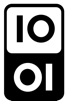


In [ ]:
!pip install geopy
from geopy.geocoders import Nominatim

geolocator = Nominatim(timeout=10, user_agent = "language.python.esilv")

def get_lat_long(row):
    address = f"{row['no_voie']} {row['type_de_voie']} {row['voie']}, {row['code_postal']} {row['commune']}"
    address = address.replace('nan ', '').replace('<Nan> ', '').replace('<NA> ', '')
    location = geolocator.geocode(address)
    if location is not None:
        return location.latitude, location.longitude
    else:
        return None, None

for i in range(len(df)):
   df.loc[i, ['latitude', 'longitude']] = get_lat_long(df.iloc[i])


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


KeyboardInterrupt: ignored